In [64]:
import tensorflow_hub as hub
import pandas as pd
import tensorflow_text as text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
# load data
data = pd.read_csv('spam.csv', encoding = "latin_1")

In [66]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [67]:
#Dropping the last 3 columns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [68]:
#Renaming the columns to be understandable
data.rename(columns={'v1': 'Category', 'v2': 'Email'}, inplace=True)
data.head()

,Category,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
# check count and unique and top values and their frequency
data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [70]:
# check percentange of data - states how much data needs to be balanced
str(round(747/4825,2))+'%'

'0.15%'

In [72]:
# creating 2 new dataframe as DataHam , DataSpam

DataSpam = data[data['Category']=='spam']
print("Spam Dataset Shape:", DataSpam.shape)

DataHam = data[data['Category']=='ham']
print("Ham Dataset Shape:", DataHam.shape)

Spam Dataset Shape: (747, 2)
Ham Dataset Shape: (4825, 2)


In [73]:
# downsampling ham dataset - take only random 747 example
# will use DataHam.shape[0] - 747

DataHamDownsampled = DataHam.sample(DataSpam.shape[0])
DataHamDownsampled.shape

(747, 2)

In [74]:
# concating both dataset - df_spam and df_ham_balanced to create df_balanced dataset
DataBalanced = pd.concat([DataSpam , DataHamDownsampled])
DataBalanced.head()

,Category,Email
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [77]:
DataBalanced.sample(10)

,Category,Email,spam
3179,ham,There the size of elephant tablets & u shove u...,0
4757,spam,URGENT! Your Mobile number has been awarded wi...,1
4650,spam,A å£400 XMAS REWARD IS WAITING FOR YOU! Our co...,1
4990,ham,We made it! Eta at taunton is 12:30 as planned...,0
3093,ham,Have you emigrated or something? Ok maybe 5.30...,0
3379,ham,Just finished. Missing you plenty,0
1367,ham,"I don't know, same thing that's wrong everyso ...",0
3037,ham,You are not bothering me but you have to trust...,0
822,spam,"SMSSERVICES. for yourinclusive text credits, p...",1
4037,ham,Hope you are not scared!,0


In [76]:
# creating numerical repersentation of category - one hot encoding
DataBalanced['spam'] = DataBalanced['Category'].apply(lambda x:1 if x=='spam' else 0)

In [78]:
# displaying data - spam -1 , ham-0
DataBalanced.sample(4)

,Category,Email,spam
116,spam,You are a winner U have been specially selecte...,1
4326,ham,Dude got a haircut. Now its breezy up there,0
4732,ham,Good Morning my Dear Shijutta........... Have ...,0
4348,ham,ÌÏ bot notes oredi... Cos i juz rem i got...,0


In [79]:
# loading train test split
TrainX, TestX , TrainY, TestY = train_test_split(DataBalanced['Email'], DataBalanced['spam'], stratify = DataBalanced['spam'])

In [80]:
# check for startification
TrainY.value_counts()

1    560
0    560
Name: spam, dtype: int64

In [81]:
560/560

1.0

In [82]:
TestX.value_counts()

Sorry, I'll call later                                                                                                                                              4
Buy Space Invaders 4 a chance 2 win orig Arcade Game console. Press 0 for Games Arcade (std WAP charge) See o2.co.uk/games 4 Terms + settings. No purchase          2
Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. å£1.50 SP:Tyrone                                      2
You have 1 new voicemail. Please call 08719181513.                                                                                                                  2
Today's Offer! Claim ur å£150 worth of discount vouchers! Text YES to 85023 now! SavaMob, member offers mobile! T Cs 08717898035. å£3.00 Sub. 16 . Unsub reply X    2
                                                                                                                                                                   ..
Chan

In [83]:
187/187

1.0

In [84]:
# downloading preprocessing files and model
BertPreprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
BertEncoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [85]:
#Process And Encode Data
TextInput = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
PreprocessedText = BertPreprocessor(TextInput)
embeed = BertEncoder(PreprocessedText)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Dense')(dropout)

# creating final model
model = tf.keras.Model(inputs = [TextInput], outputs = [outputs])

# check summary of model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_mask': (Non  0           ['Inputs[0][0]']                 
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [88]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'Accuracy Score'),
           tf.keras.metrics.Precision(name = 'Precision Score'),
           tf.keras.metrics.Recall(name = 'Recall Score')
           ]

model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [87]:
history = model.fit(TrainX, TrainY, epochs = 10)

Epoch 1/10
35/35 [==============================] - 161s 4s/step - loss: 0.6128 - accuracy: 0.6911 - precision: 0.6884 - recall: 0.6982
Epoch 2/10
35/35 [==============================] - 147s 4s/step - loss: 0.4960 - accuracy: 0.8241 - precision: 0.8157 - recall: 0.8375
Epoch 3/10
35/35 [==============================] - 147s 4s/step - loss: 0.4244 - accuracy: 0.8643 - precision: 0.8505 - recall: 0.8839
Epoch 4/10
35/35 [==============================] - 146s 4s/step - loss: 0.3803 - accuracy: 0.8875 - precision: 0.8834 - recall: 0.8929
Epoch 5/10
35/35 [==============================] - 146s 4s/step - loss: 0.3561 - accuracy: 0.8857 - precision: 0.8803 - recall: 0.8929
Epoch 6/10
35/35 [==============================] - 147s 4s/step - loss: 0.3340 - accuracy: 0.8946 - precision: 0.8771 - recall: 0.9179
Epoch 7/10
35/35 [==============================] - 146s 4s/step - loss: 0.3178 - accuracy: 0.9027 - precision: 0.8991 - recall: 0.9071
Epoch 8/10
35/35 [==============================

In [89]:
# Evaluating performace
model.evaluate(TestX,TestY)

12/12 [==============================] - 51s 4s/step - loss: 0.2480 - Accuracy Score: 0.9225 - Precision Score: 0.9202 - Recall Score: 0.9251


[0.24795329570770264,
 0.9224599003791809,
 0.9202127456665039,
 0.9251337051391602]

In [90]:
# getting PredY by predicting over TestX and flattening it
PredY = model.predict(TestX)
PredY = PredY.flatten() # require to be in one dimensional array , for easy maniputation

12/12 [==============================] - 50s 4s/step


In [91]:
# checking the results PredY
PredY = np.where(PredY>0.5,1,0 )
PredY 

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [92]:
# creating confusion matrix 
cm = confusion_matrix(TestY,PredY)
cm

array([[172,  15],
       [ 14, 173]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

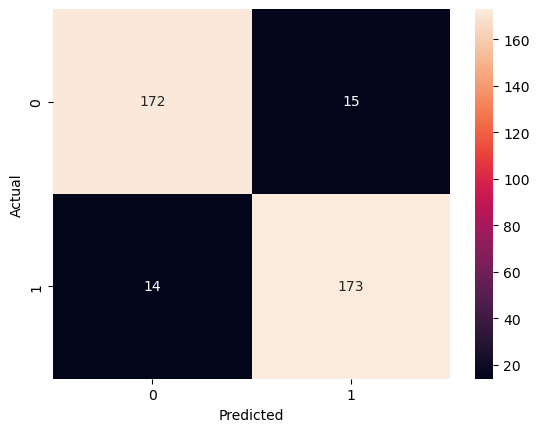

In [93]:
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [94]:
# printing classification report
print(classification_report(TestY , PredY))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       187
           1       0.92      0.93      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374



In [95]:
# Model Prediction
PredictText = [
                'We’d all like to get a $10,000 deposit on our bank accounts out of the blue, but winning a prize—especially if you’ve never entered a contest', 
                'Netflix is sending you a refund of $12.99. Please reply with your bank account and routing number to verify and get your refund', 
                'Your account is temporarily frozen. Please log in to to secure your account ', 
                'The article was published on 18th August itself',
                'Although we are unable to give you an exact time-frame at the moment, I would request you to stay tuned for any updates.',
                'The image you sent is a UI bug, I can check that your article is marked as regular and is not in the monetization program.'
]

In [96]:
TestResults = model.predict(PredictText)
output = np.where(TestResults>0.5,'spam', 'ham') 
output

1/1 [==============================] - 2s 2s/step


array([['ham'],
       ['spam'],
       ['spam'],
       ['ham'],
       ['ham'],
       ['spam']], dtype='<U4')

In [97]:
# Additional Content
def get_embedding(sentence_arr):
    'takes in sentence array and return embedding vector'
    PreprocessedText = BertPreprocessor(sentence_arr)
    embeddings = BertEncoder(PreprocessedText)['pooled_output']
    return embeddings

In [98]:
e = get_embedding([
               'We’d all like to get a $10,000 deposit on our bank accounts out of the blue, but winning a prize—especially if you’ve never entered a contest',
               'The image you sent is a UI bug, I can check that your article is marked as regular and is not in the monetization program.'
])

In [99]:
# check similarity score
print(f'Similarity score between 1st sentence(spam) and second sentence(spam) : {cosine_similarity([e[0]] , [e[1]])}')

Similarity score between 1st sentence(spam) and second sentence(spam) : [[0.85391915]]
